In [15]:
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression,HuberRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from patsy import dmatrix
import math
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Dataset/result_003.csv")

In [3]:
df.dropna(inplace=True)

In [4]:
df=df.drop(columns=['30','31','32','33','34','35'],axis=1)
df_mc=df[['36']]
df_mc.columns=['mc']


In [5]:
df=df.drop(columns=['36'])

In [6]:
df_1=df.copy()
df_1

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-2.38,-0.88,-0.75,-0.88,0.12,0.50,0.00,0.12,0.63,-0.12,...,0.50,0.88,-0.50,-0.12,1.25,0.37,-0.63,0.00,-1.25,-0.88
1,-2.38,-1.37,-0.88,-1.00,0.12,0.25,0.00,0.12,0.75,-0.37,...,0.50,0.75,-0.50,-0.37,0.88,0.12,-0.63,-0.12,-1.25,-0.88
2,-2.38,-1.12,-0.75,-1.12,0.12,0.50,0.12,0.12,0.63,-0.25,...,0.75,0.75,-0.50,-0.12,1.00,-0.25,-0.12,-0.12,-1.25,-0.37
3,-2.38,-1.12,-0.75,-1.25,0.25,0.63,-0.12,-0.12,0.88,-0.37,...,1.00,0.75,-0.63,0.37,0.50,-0.25,0.00,-0.12,-1.37,-0.50
4,-2.50,-0.88,-0.75,-1.12,0.12,0.63,-0.12,-0.12,1.00,-0.37,...,1.12,0.50,-0.50,0.37,0.37,0.12,0.12,-0.12,-0.75,-0.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5853,-3.63,-1.63,-1.37,-2.00,0.25,0.50,-1.12,-0.50,2.00,1.63,...,2.00,2.25,-0.12,-0.88,-0.50,-0.75,-0.37,-0.37,-3.25,-1.88
5854,-3.63,-2.13,-1.37,-1.88,0.12,0.50,-1.12,-0.63,1.88,1.63,...,2.13,1.75,-0.63,-0.50,-0.63,-0.25,0.00,-1.50,-3.25,-1.50
5855,-3.50,-1.88,-1.50,-2.00,0.25,0.50,-0.88,-0.63,1.50,1.63,...,2.00,2.13,-0.63,0.12,-0.63,-1.25,-0.12,-1.00,-2.75,-1.37
5856,-3.63,-2.38,-1.37,-2.00,0.37,0.37,-1.12,-0.37,1.88,1.50,...,2.13,2.50,-0.75,-0.37,-0.37,-1.00,0.37,-1.00,-3.63,-1.50


In [7]:
for i in range(30):
    df['{}'.format(i)]= df['12']-df['{}'.format(i)]

for i in range(30):
    df_1['{}'.format(i)]= df['25']-df['{}'.format(i)]


In [8]:
df=df.drop(columns=['12'])
df_1=df_1.drop(columns=['25'])

In [9]:
df.columns=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29']
df

,1,2,3,4,5,6,7,8,9,10,...,20,21,22,23,24,25,26,27,28,29
0,3.75,2.25,2.12,2.25,1.25,0.87,1.37,1.25,0.74,1.49,...,-0.50,-0.88,0.50,0.12,-1.25,-0.37,0.63,0.00,1.25,0.88
1,3.13,2.12,1.63,1.75,0.63,0.50,0.75,0.63,0.00,1.12,...,-0.50,-0.75,0.50,0.37,-0.88,-0.12,0.63,0.12,1.25,0.88
2,3.38,2.12,1.75,2.12,0.88,0.50,0.88,0.88,0.37,1.25,...,-0.75,-0.75,0.50,0.12,-1.00,0.25,0.12,0.12,1.25,0.37
3,3.75,2.49,2.12,2.62,1.12,0.74,1.49,1.49,0.49,1.74,...,-1.00,-0.75,0.63,-0.37,-0.50,0.25,0.00,0.12,1.37,0.50
4,6.13,4.51,4.38,4.75,3.51,3.00,3.75,3.75,2.63,4.00,...,-1.12,-0.50,0.50,-0.37,-0.37,-0.12,-0.12,0.12,0.75,0.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5853,6.38,4.38,4.12,4.75,2.50,2.25,3.87,3.25,0.75,1.12,...,-2.00,-2.25,0.12,0.88,0.50,0.75,0.37,0.37,3.25,1.88
5854,4.88,3.38,2.62,3.13,1.13,0.75,2.37,1.88,-0.63,-0.38,...,-2.13,-1.75,0.63,0.50,0.63,0.25,0.00,1.50,3.25,1.50
5855,4.38,2.76,2.38,2.88,0.63,0.38,1.76,1.51,-0.62,-0.75,...,-2.00,-2.13,0.63,-0.12,0.63,1.25,0.12,1.00,2.75,1.37
5856,4.13,2.88,1.87,2.50,0.13,0.13,1.62,0.87,-1.38,-1.00,...,-2.13,-2.50,0.75,0.37,0.37,1.00,-0.37,1.00,3.63,1.50


In [10]:
df_1.columns=['30','31','32','33','34','35','36','37','38','39','40','41','42','43','44','45','46','47','48','49','50','51','52','53','54','55','56','57','58']

In [11]:
df=pd.concat([df,df_1],axis=1)
df=pd.concat([df,df_mc],axis=1)
df

,1,2,3,4,5,6,7,8,9,10,...,50,51,52,53,54,55,56,57,58,mc
0,3.75,2.25,2.12,2.25,1.25,0.87,1.37,1.25,0.74,1.49,...,0.13,0.51,-0.87,-0.49,0.88,-1.00,-0.37,-1.62,-1.25,1.087903
1,3.13,2.12,1.63,1.75,0.63,0.50,0.75,0.63,0.00,1.12,...,0.38,0.63,-0.62,-0.49,0.76,-0.75,-0.24,-1.37,-1.00,1.064780
2,3.38,2.12,1.75,2.12,0.88,0.50,0.88,0.88,0.37,1.25,...,1.00,1.00,-0.25,0.13,1.25,0.13,0.13,-1.00,-0.12,1.044257
3,3.75,2.49,2.12,2.62,1.12,0.74,1.49,1.49,0.49,1.74,...,1.25,1.00,-0.38,0.62,0.75,0.25,0.13,-1.12,-0.25,1.025477
4,6.13,4.51,4.38,4.75,3.51,3.00,3.75,3.75,2.63,4.00,...,1.00,0.38,-0.62,0.25,0.25,0.00,-0.24,-0.87,-0.75,1.009584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5853,6.38,4.38,4.12,4.75,2.50,2.25,3.87,3.25,0.75,1.12,...,2.75,3.00,0.63,-0.13,0.25,0.38,0.38,-2.50,-1.13,1.297385
5854,4.88,3.38,2.62,3.13,1.13,0.75,2.37,1.88,-0.63,-0.38,...,2.38,2.00,-0.38,-0.25,-0.38,0.25,-1.25,-3.00,-1.25,1.309049
5855,4.38,2.76,2.38,2.88,0.63,0.38,1.76,1.51,-0.62,-0.75,...,3.25,3.38,0.62,1.37,0.62,1.13,0.25,-1.50,-0.12,1.315252
5856,4.13,2.88,1.87,2.50,0.13,0.13,1.62,0.87,-1.38,-1.00,...,3.13,3.50,0.25,0.63,0.63,1.37,0.00,-2.63,-0.50,1.312718


In [12]:
scaler=MinMaxScaler()
for i in range(1,59):
    scaler.fit(df[['{}'.format(i)]])
    df[['{}'.format(i)]]=scaler.transform(df[['{}'.format(i)]])

df

,1,2,3,4,5,6,7,8,9,10,...,50,51,52,53,54,55,56,57,58,mc
0,0.45250,0.441538,0.516000,0.467784,0.571429,0.573333,0.458716,0.507874,0.705234,0.676129,...,0.071625,0.274298,0.347692,0.253333,0.688119,0.095057,0.600,0.683636,0.348,1.087903
1,0.37500,0.421538,0.450667,0.403351,0.482857,0.518519,0.377457,0.426509,0.603306,0.628387,...,0.140496,0.300216,0.424615,0.253333,0.628713,0.190114,0.652,0.774545,0.448,1.064780
2,0.40625,0.421538,0.466667,0.451031,0.518571,0.518519,0.394495,0.459318,0.654270,0.645161,...,0.311295,0.380130,0.538462,0.460000,0.871287,0.524715,0.800,0.909091,0.800,1.044257
3,0.45250,0.478462,0.516000,0.515464,0.552857,0.554074,0.474443,0.539370,0.670799,0.708387,...,0.380165,0.380130,0.498462,0.623333,0.623762,0.570342,0.800,0.865455,0.748,1.025477
4,0.75000,0.789231,0.817333,0.789948,0.894286,0.888889,0.770642,0.835958,0.965565,1.000000,...,0.311295,0.246220,0.424615,0.500000,0.376238,0.475285,0.652,0.956364,0.548,1.009584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5853,0.78125,0.769231,0.782667,0.789948,0.750000,0.777778,0.786370,0.770341,0.706612,0.628387,...,0.793388,0.812095,0.809231,0.373333,0.376238,0.619772,0.900,0.363636,0.396,1.297385
5854,0.59375,0.615385,0.582667,0.581186,0.554286,0.555556,0.589777,0.590551,0.516529,0.434839,...,0.691460,0.596112,0.498462,0.333333,0.064356,0.570342,0.248,0.181818,0.348,1.309049
5855,0.53125,0.520000,0.550667,0.548969,0.482857,0.500741,0.509830,0.541995,0.517906,0.387097,...,0.931129,0.894168,0.806154,0.873333,0.559406,0.904943,0.848,0.727273,0.800,1.315252
5856,0.50000,0.538462,0.482667,0.500000,0.411429,0.463704,0.491481,0.458005,0.413223,0.354839,...,0.898072,0.920086,0.692308,0.626667,0.564356,0.996198,0.748,0.316364,0.648,1.312718


In [601]:
scaler.fit(df_mc)
df_mc=scaler.transform(df_mc)
df_mc

array([[0.74110539],
       [0.71625706],
       [0.69420191],
       ...,
       [0.98542499],
       [0.98270173],
       [0.96646356]])

In [351]:
scaler=StandardScaler()
for i in range(31):
    scaler.fit(df[['{}'.format(i)]])
    df[['{}'.format(i)]]=scaler.transform(df[['{}'.format(i)]])
df

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,mc
0,-0.434052,-0.826358,-0.050417,-0.394965,0.317825,0.254621,-0.361853,-0.071642,1.010271,0.920018,...,0.347692,0.253333,0.688119,0.0,0.095057,0.600,0.683636,0.348,0.946667,1.087903
1,-0.989024,-0.969144,-0.503352,-0.853931,-0.256679,-0.104842,-0.935555,-0.622662,0.348525,0.606868,...,0.424615,0.253333,0.628713,0.0,0.190114,0.652,0.774545,0.448,0.946667,1.064780
2,-0.765245,-0.969144,-0.392429,-0.514296,-0.025024,-0.104842,-0.815263,-0.400477,0.679398,0.716894,...,0.538462,0.460000,0.871287,0.0,0.524715,0.800,0.909091,0.800,0.888889,1.044257
3,-0.434052,-0.562753,-0.050417,-0.055330,0.197365,0.128323,-0.250814,0.141655,0.786708,1.131606,...,0.498462,0.623333,0.623762,0.0,0.570342,0.800,0.865455,0.748,0.835556,1.025477
4,1.696325,1.655926,2.038630,1.899867,2.411986,2.323963,1.840422,2.150210,2.700408,3.044362,...,0.424615,0.500000,0.376238,0.0,0.475285,0.652,0.956364,0.548,0.782222,1.009584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5853,1.920104,1.513140,1.798297,1.899867,1.476100,1.595322,1.951461,1.705840,1.019214,0.606868,...,0.809231,0.373333,0.376238,0.0,0.619772,0.900,0.363636,0.396,0.111111,1.297385
5854,0.577429,0.414784,0.411762,0.412816,0.206631,0.138038,0.563472,0.488264,-0.214854,-0.662660,...,0.498462,0.333333,0.064356,0.0,0.570342,0.248,0.181818,0.348,0.111111,1.309049
5855,0.129871,-0.266197,0.189916,0.183333,-0.256679,-0.221425,-0.000976,0.159430,-0.205912,-0.975810,...,0.806154,0.873333,0.559406,0.0,0.904943,0.848,0.727273,0.800,0.057778,1.315252
5856,-0.093908,-0.134394,-0.281506,-0.165482,-0.719989,-0.464306,-0.130522,-0.409364,-0.885543,-1.187398,...,0.692308,0.626667,0.564356,0.0,0.996198,0.748,0.316364,0.648,0.057778,1.312718


## Dataset 12,28 to regression

In [54]:
data = df[['12','28']]
data

,12,28
0,0.552857,0.809231
1,0.464286,0.809231
2,0.500000,0.809231
3,0.552857,0.772308
4,0.875714,0.963077
...,...,...
5853,0.750000,0.193846
5854,0.535714,0.193846
5855,0.482857,0.347692
5856,0.428571,0.076923


In [364]:
target=df_mc.values
target

array([[1.08790267],
       [1.06478027],
       [1.04425704],
       ...,
       [1.31525212],
       [1.31271801],
       [1.29760772]])

In [59]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3,shuffle=False , random_state=10)

In [57]:
poly = PolynomialFeatures(degree=2,include_bias=False)
poly.fit(x_train)

x_train_poly=poly.transform(x_train)
poly.fit(x_test)
x_test_poly=poly.transform(x_test)

In [60]:
model_poly = linear_model.Ridge(alpha=0.9,tol=1e-9,solver='svd').fit(x_train,y_train)

In [61]:
pre=model_poly.predict(x_test)
pre

array([[0.92547385],
       [0.92461838],
       [0.92647948],
       ...,
       [0.92722781],
       [0.92634973],
       [0.92859109]])

In [62]:
model_poly.score(x_test,y_test)

-0.0005960056980689465

In [92]:
max(y_test[[1,2]])

array([1.00488029])

In [63]:
ep_12=[]
for i in range(1,1700,1):
    RMSE=mean_squared_error(y_test[:i],pre[:i])**0.5
    ep_12.append(RMSE)

In [97]:
max(y_test[[:2]])

SyntaxError: invalid syntax (2188160329.py, line 1)

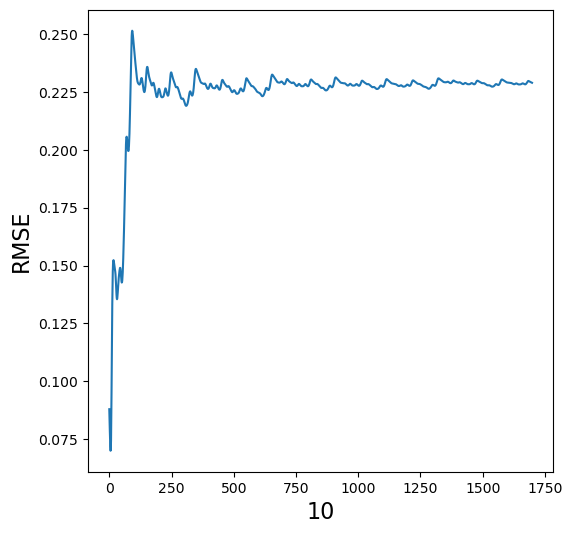

In [64]:
fig = plt.figure()
fig.set_size_inches(6,6)
plt.plot(ep_12)
plt.xlabel("10",fontsize = 16)
plt.ylabel("RMSE",fontsize = 16)
plt.show()

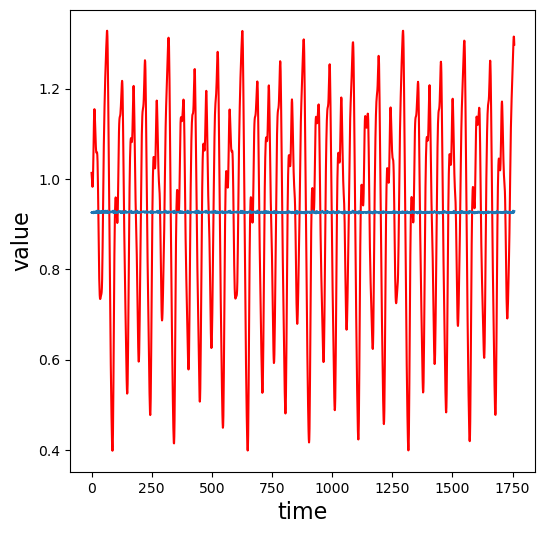

In [65]:
fig = plt.figure()
fig.set_size_inches(6,6)
plt.plot(y_test,c='r')
plt.plot(pre)
plt.xlabel("time",fontsize = 16)
plt.ylabel("value",fontsize = 16)

plt.show()

## 11-13, 26-29 Dataset

In [ ]:
data_pick=df[['11','12','13','26','27','28','29']]
data_pick

In [365]:
target_pick=df_mc.values
target_pick

array([[1.08790267],
       [1.06478027],
       [1.04425704],
       ...,
       [1.31525212],
       [1.31271801],
       [1.29760772]])

In [ ]:
x_train_pick, x_test_pick, y_train_pick, y_test_pick = train_test_split(data_pick, target_pick, test_size=0.3, shuffle=False, random_state=0)

In [ ]:
poly=PolynomialFeatures(degree=2,include_bias=False)
poly.fit(x_train_pick)
x_train_pick_poly=poly.transform(x_train_pick)
x_test_pick_poly = poly.transform(x_test_pick)

In [ ]:
model_pick_poly = linear_model.Ridge(alpha=0.6,tol=1e-5,solver='svd').fit(x_train_pick,y_train_pick)

In [ ]:
pre_pick_poly=model_pick_poly.predict(x_test_pick)
pre_pick_poly

In [ ]:
fig = plt.figure()
fig.set_size_inches(6,6)
plt.plot(y_test_pick,c='r')
plt.plot(pre_pick_poly)
plt.xlabel("time",fontsize = 16)
plt.ylabel("value",fontsize = 16)

plt.show()

In [ ]:
model_pick_poly.score(x_test_pick,y_test_pick)

In [ ]:
pre_pick_poly=pd.DataFrame(pre_pick_poly,columns=['predict'])

In [ ]:
y_test_pd=pd.DataFrame(y_test_pick,columns=['target'])
corr_pick_poly_pd=pd.concat([pre_pick_poly,y_test_pd],axis=1)

In [ ]:
corr_pick_poly_pd.corr()

In [ ]:
RMSE = mean_squared_error(y_test_pick, pre_pick_poly)**0.5
RMSE

# except upper 30

In [602]:
data_upper = df.drop(columns=['mc'],axis=1)
data_upper

,1,2,3,4,5,6,7,8,9,10,...,49,50,51,52,53,54,55,56,57,58
0,0.45250,0.441538,0.516000,0.467784,0.571429,0.573333,0.458716,0.507874,0.705234,0.676129,...,0.159664,0.071625,0.274298,0.347692,0.253333,0.688119,0.095057,0.600,0.683636,0.348
1,0.37500,0.421538,0.450667,0.403351,0.482857,0.518519,0.377457,0.426509,0.603306,0.628387,...,0.212185,0.140496,0.300216,0.424615,0.253333,0.628713,0.190114,0.652,0.774545,0.448
2,0.40625,0.421538,0.466667,0.451031,0.518571,0.518519,0.394495,0.459318,0.654270,0.645161,...,0.184874,0.311295,0.380130,0.538462,0.460000,0.871287,0.524715,0.800,0.909091,0.800
3,0.45250,0.478462,0.516000,0.515464,0.552857,0.554074,0.474443,0.539370,0.670799,0.708387,...,0.157563,0.380165,0.380130,0.498462,0.623333,0.623762,0.570342,0.800,0.865455,0.748
4,0.75000,0.789231,0.817333,0.789948,0.894286,0.888889,0.770642,0.835958,0.965565,1.000000,...,0.107143,0.311295,0.246220,0.424615,0.500000,0.376238,0.475285,0.652,0.956364,0.548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5853,0.78125,0.769231,0.782667,0.789948,0.750000,0.777778,0.786370,0.770341,0.706612,0.628387,...,0.867647,0.793388,0.812095,0.809231,0.373333,0.376238,0.619772,0.900,0.363636,0.396
5854,0.59375,0.615385,0.582667,0.581186,0.554286,0.555556,0.589777,0.590551,0.516529,0.434839,...,0.920168,0.691460,0.596112,0.498462,0.333333,0.064356,0.570342,0.248,0.181818,0.348
5855,0.53125,0.520000,0.550667,0.548969,0.482857,0.500741,0.509830,0.541995,0.517906,0.387097,...,0.842437,0.931129,0.894168,0.806154,0.873333,0.559406,0.904943,0.848,0.727273,0.800
5856,0.50000,0.538462,0.482667,0.500000,0.411429,0.463704,0.491481,0.458005,0.413223,0.354839,...,0.920168,0.898072,0.920086,0.692308,0.626667,0.564356,0.996198,0.748,0.316364,0.648


In [603]:
target_upper=df_mc
target_upper

array([[0.74110539],
       [0.71625706],
       [0.69420191],
       ...,
       [0.98542499],
       [0.98270173],
       [0.96646356]])

In [619]:
x_train_upper, x_test_upper, y_train_upper, y_test_upper = train_test_split(data_upper, target_upper, test_size=0.3, shuffle=False, random_state=None)

In [620]:
x_train_upper, X2_val, y_train_upper, y_val = train_test_split(x_train_upper, y_train_upper,test_size=0.3)

In [504]:
x_train_upper = sm.add_constant(x_train_upper, has_constant = "add")

In [505]:

multi_model=sm.OLS(y_train_upper,x_train_upper)

fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8398
Date:                Mon, 30 Jan 2023   Prob (F-statistic):              0.711
Time:                        11:54:08   Log-Likelihood:                -49.381
No. Observations:                4100   AIC:                             158.8
Df Residuals:                    4070   BIC:                             348.3
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1635      0.039      4.211      0.000       0.087       0.240
1             -0.0341      0.013     -2.531      0.011      -0.061      -0.008
2             -0.0131      0.008     -1.743      0.081      -0.028       0.002
3              0.0088      0.008      1.115      0.265      -0.007       0.024
4              0.0094      0.006      1.465      0.143      -0.003       0.022
5              0.0379      0.010      3.920      0.000       0.019       0.057
6              0.0436      0.011      3.866      0.000       0.021       0.066
7              0.0117      0.008      1.427      0.154      -0.004       0.028
8              0.0329      0.009      3.471      0.001       0.014       0.051
9              0.0657      0.017      3.785      0.000       0.032       0.100
10             0.0567      0.012      4.687      0.000       0.033       0.080
11            -0.0205      0.007     -2.988      0.003      -0.034      -0.007
12             0.0311      0.008      3.824      0.000       0.015       0.047
13             0.0121      0.014      0.865      0.387      -0.015       0.040
14             0.0868      0.018      4.849      0.000       0.052       0.122
15             0.0600      0.014      4.341      0.000       0.033       0.087
16             0.0513      0.014      3.746      0.000       0.024       0.078
17             0.0761      0.021      3.647      0.000       0.035       0.117
18             0.0384      0.010      3.843      0.000       0.019       0.058
19             0.0287      0.009      3.202      0.001       0.011       0.046
20             0.0784      0.020      3.956      0.000       0.040       0.117
21             0.0850      0.019      4.476      0.000       0.048       0.122
22            -0.0420      0.024     -1.782      0.075      -0.088       0.004
23            -0.0387      0.020     -1.975      0.048      -0.077      -0.000
24             0.0182      0.017      1.059      0.290      -0.015       0.052
25            -0.0170      0.013     -1.287      0.198      -0.043       0.009
26            -0.0271      0.021     -1.263      0.207      -0.069       0.015
27            -0.0667      0.022     -3.029      0.002      -0.110      -0.024
28            -0.0829      0.029     -2.891      0.004      -0.139      -0.027
29            -0.1198      0.038     -3.166      0.002      -0.194      -0.046
30             0.0454      0.062      0.736      0.462      -0.076       0.166
31            -0.0194      0.019     -1.001      0.317      -0.057       0.019
32             0.0138      0.056      0.246      0.806      -0.096       0.124
33            -0.0537      0.043     -1.245      0.213      -0.138       0.031
34            -0.0217      0.039     -0.558      0.577      -0.098       0.054
35            -0.0096      0.036     -0.269      0.788      -0.080       0.061
36

In [506]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(data_upper.values, i) for i in range(data_upper.shape[1])]
vif["features"] = data_upper.columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,inf,1
1,inf,32
2,inf,33
3,inf,34
4,inf,35
5,inf,36
6,inf,37
7,inf,38
8,inf,39
9,inf,40


In [507]:
plt.plot(np.array(fitted_multi_model.predict(x_test_upper)))
plt.plot(np.array(y_test_upper),c='r')

ValueError: shapes (1758,58) and (59,) not aligned: 58 (dim 1) != 59 (dim 0)

In [ ]:
poly=PolynomialFeatures(degree=4,include_bias=True)
poly.fit(x_train_upper)
x_train_pick_upper=poly.transform(x_train_upper)
x_test_pick_upper = poly.transform(x_test_upper)

In [ ]:
y_train_upper=np.array(y_train_upper).ravel()

In [325]:
parameters={'alpha':[1e-4],'tol':[1e-5],'max_iter':[1000]}

In [ ]:
model_hub=HuberRegressor()
model_hub = GridSearchCV(model_hub, param_grid=parameters, cv=3, refit=True)
model_hub.fit(x_train_pick_upper,y_train_upper)

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/linear_model/_huber.py:335: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/linear_model/_huber.py:335: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [327]:
scores_df = pd.DataFrame(model_hub.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'alpha': 0.0001, 'max_iter': 1000, 'tol': 1e-05}",-0.048819,1,-0.062732,-0.015967,-0.067757


In [280]:
parameters= {'alpha':[1e-3,1e-4,1e-5],'tol':[1e-3,1e-4,1e-5],'shuffle':[False],'epsilon':[1e-1,1e-2,1e-3]}

In [281]:
model_sgd=SGDRegressor()
model_sgd = GridSearchCV(model_sgd, param_grid=parameters, cv=3, refit=True)
model_sgd.fit(x_train_pick_upper,y_train_upper)

GridSearchCV(cv=3, estimator=SGDRegressor(),
             param_grid={'alpha': [0.001, 0.0001, 1e-05],
                         'epsilon': [0.1, 0.01, 0.001], 'shuffle': [False],
                         'tol': [0.001, 0.0001, 1e-05]})

In [59]:
scores_df = pd.DataFrame(model_sgd.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'alpha': 0.001, 'epsilon': 0.1, 'shuffle': Fa...",-0.229480,1,-0.468844,-0.044169,-0.175427
1,"{'alpha': 0.001, 'epsilon': 0.1, 'shuffle': Fa...",-0.229480,1,-0.468844,-0.044169,-0.175427
2,"{'alpha': 0.001, 'epsilon': 0.1, 'shuffle': Fa...",-0.229480,1,-0.468844,-0.044169,-0.175427
3,"{'alpha': 0.001, 'epsilon': 0.01, 'shuffle': F...",-0.229480,1,-0.468844,-0.044169,-0.175427
4,"{'alpha': 0.001, 'epsilon': 0.01, 'shuffle': F...",-0.229480,1,-0.468844,-0.044169,-0.175427
5,"{'alpha': 0.001, 'epsilon': 0.01, 'shuffle': F...",-0.229480,1,-0.468844,-0.044169,-0.175427
6,"{'alpha': 0.001, 'epsilon': 0.001, 'shuffle': ...",-0.229480,1,-0.468844,-0.044169,-0.175427
7,"{'alpha': 0.001, 'epsilon': 0.001, 'shuffle': ...",-0.229480,1,-0.468844,-0.044169,-0.175427
8,"{'alpha': 0.001, 'epsilon': 0.001, 'shuffle': ...",-0.229480,1,-0.468844,-0.044169,-0.175427
9,"{'alpha': 0.0001, 'epsilon': 0.1, 'shuffle': F...",-0.233147,10,-0.479853,-0.044206,-0.175383


In [22]:
parameters={'kernel':['linear','poly','rbf'],'gamma':['auto','scale'],'tol':[1e-3,1e-4,1e-10]}

In [34]:
model_svr=svm.SVR()
model_svr = GridSearchCV(model_svr, param_grid=parameters, cv=3, refit=True)
model_svr.fit(x_train_pick_upper,y_train_upper)

GridSearchCV(cv=3, estimator=SVR(),
             param_grid={'gamma': ['auto', 'scale'],
                         'kernel': ['linear', 'poly', 'rbf'],
                         'tol': [0.001, 0.0001, 1e-10]})

In [35]:
scores_df = pd.DataFrame(model_svr.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'gamma': 'auto', 'kernel': 'linear', 'tol': 0...",-0.140205,14,-0.223105,-0.068555,-0.128955
1,"{'gamma': 'auto', 'kernel': 'linear', 'tol': 0...",-0.140023,12,-0.221288,-0.068745,-0.130035
2,"{'gamma': 'auto', 'kernel': 'linear', 'tol': 1...",-0.139991,10,-0.221029,-0.068761,-0.130182
3,"{'gamma': 'auto', 'kernel': 'poly', 'tol': 0.001}",-0.021591,1,-0.025406,-0.016157,-0.023209
4,"{'gamma': 'auto', 'kernel': 'poly', 'tol': 0.0...",-0.021654,2,-0.025406,-0.016531,-0.023027
5,"{'gamma': 'auto', 'kernel': 'poly', 'tol': 1e-10}",-0.021657,3,-0.025406,-0.016540,-0.023026
6,"{'gamma': 'auto', 'kernel': 'rbf', 'tol': 0.001}",-0.037839,4,-0.064279,-0.019264,-0.029973
7,"{'gamma': 'auto', 'kernel': 'rbf', 'tol': 0.0001}",-0.037974,5,-0.064570,-0.019342,-0.030010
8,"{'gamma': 'auto', 'kernel': 'rbf', 'tol': 1e-10}",-0.037985,6,-0.064579,-0.019359,-0.030017
9,"{'gamma': 'scale', 'kernel': 'linear', 'tol': ...",-0.140205,14,-0.223105,-0.068555,-0.128955


In [397]:
parameters={'alpha':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],'tol':[1e-7,1e-8,1e-9,1e-10],'solver':['auto','svd']}

In [563]:
model_upper=linear_model.Ridge()
model_upper = GridSearchCV(model_upper, param_grid=parameters,  refit=True)
model_upper.fit(x_train_upper,y_train_upper)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
                         'solver': ['auto', 'svd'],
                         'tol': [1e-07, 1e-08, 1e-09, 1e-10]})

In [564]:
scores_df = pd.DataFrame(model_upper.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'alpha': 0.1, 'solver': 'auto', 'tol': 1e-07}",-0.006048,65,0.001612,-0.000300,-0.011265
1,"{'alpha': 0.1, 'solver': 'auto', 'tol': 1e-08}",-0.006048,65,0.001612,-0.000300,-0.011265
2,"{'alpha': 0.1, 'solver': 'auto', 'tol': 1e-09}",-0.006048,65,0.001612,-0.000300,-0.011265
3,"{'alpha': 0.1, 'solver': 'auto', 'tol': 1e-10}",-0.006048,65,0.001612,-0.000300,-0.011265
4,"{'alpha': 0.1, 'solver': 'svd', 'tol': 1e-07}",-0.006048,69,0.001612,-0.000300,-0.011265
...,...,...,...,...,...,...
67,"{'alpha': 0.9, 'solver': 'auto', 'tol': 1e-10}",-0.005591,1,0.001875,0.000178,-0.010637
68,"{'alpha': 0.9, 'solver': 'svd', 'tol': 1e-07}",-0.005591,5,0.001875,0.000178,-0.010637
69,"{'alpha': 0.9, 'solver': 'svd', 'tol': 1e-08}",-0.005591,5,0.001875,0.000178,-0.010637
70,"{'alpha': 0.9, 'solver': 'svd', 'tol': 1e-09}",-0.005591,5,0.001875,0.000178,-0.010637


In [292]:
per_upper_svr = model_svr.predict(x_test_pick_upper)
per_upper_svr.reshape(-1,1)

array([[0.96069058],
       [0.95936189],
       [0.9607556 ],
       ...,
       [0.96117838],
       [0.96115779],
       [0.96107124]])

In [47]:
parameters={'alpha':[1e-2,4e-3,1e-4,3e-4,1e-5]}

In [48]:
model_gpr=GaussianProcessRegressor()
model_gpr = GridSearchCV(model_gpr, param_grid=parameters,  refit=True)
model_gpr.fit(x_train_upper,y_train_upper)

GridSearchCV(estimator=GaussianProcessRegressor(),
             param_grid={'alpha': [0.01, 0.004, 0.0001, 0.0003, 1e-05]})

In [49]:
scores_df = pd.DataFrame(model_gpr.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,{'alpha': 0.01},-0.370740,1,-0.880353,-0.213999,-0.214962
1,{'alpha': 0.004},-0.714777,2,-2.032100,-0.325206,-0.354677
2,{'alpha': 0.0001},-4.025108,4,-12.165930,-1.263710,-1.409305
3,{'alpha': 0.0003},-2.832904,3,-8.822201,-0.908980,-1.029984
4,{'alpha': 1e-05},-5.456302,5,-15.910925,-1.740320,-1.878558


In [53]:
model_gpr=GaussianProcessRegressor(alpha=0.1).fit(x_train_upper,y_train_upper)
per_upper_gpr = model_gpr.predict(x_test_upper)
per_upper_gpr.reshape(-1,1)

array([[0.91787008],
       [0.89100809],
       [0.88440176],
       ...,
       [0.77523542],
       [0.89276731],
       [0.67304902]])

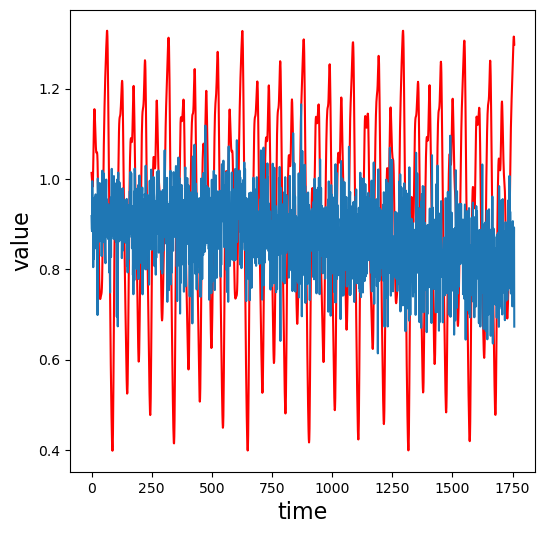

In [54]:
fig = plt.figure()
fig.set_size_inches(6,6)
plt.plot(np.array(y_test_upper),c='r')
plt.plot(per_upper_gpr)
plt.xlabel("time",fontsize = 16)
plt.ylabel("value",fontsize = 16)

plt.show()

In [55]:
model_gpr.score(x_test_upper,y_test_upper)

-0.1987726664450291

In [621]:
model_upper=linear_model.Ridge(alpha=0.9, tol=1e-10,solver='auto').fit(x_train_upper,y_train_upper)
per_upper_rid = model_upper.predict(x_test_upper)
per_upper_rid.reshape(-1,1)

array([[0.58344878],
       [0.56448164],
       [0.58744913],
       ...,
       [0.60748334],
       [0.60459717],
       [0.60585237]])

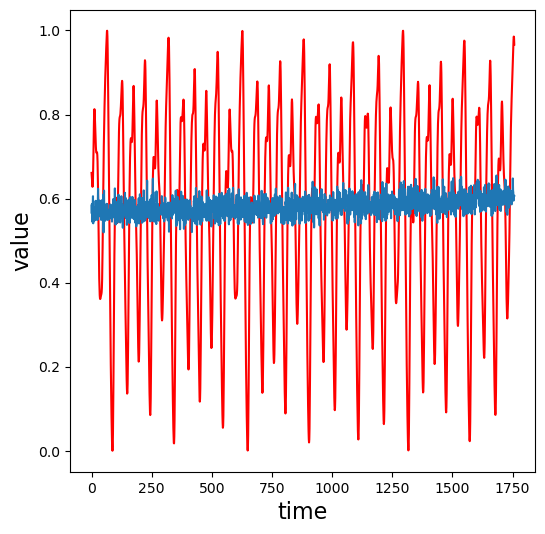

In [622]:
fig = plt.figure()
fig.set_size_inches(6,6)
plt.plot(np.array(y_test_upper),c='r')
plt.plot(per_upper_rid)
plt.xlabel("time",fontsize = 16)
plt.ylabel("value",fontsize = 16)

plt.show()

In [623]:
per_upper_rid

array([[0.58344878],
       [0.56448164],
       [0.58744913],
       ...,
       [0.60748334],
       [0.60459717],
       [0.60585237]])

In [624]:
scaler.fit(per_upper_rid)
per_upper_rid=scaler.transform(per_upper_rid)
per_upper_rid

array([[0.47294755],
       [0.33291453],
       [0.50248181],
       ...,
       [0.65039296],
       [0.62908454],
       [0.63835163]])

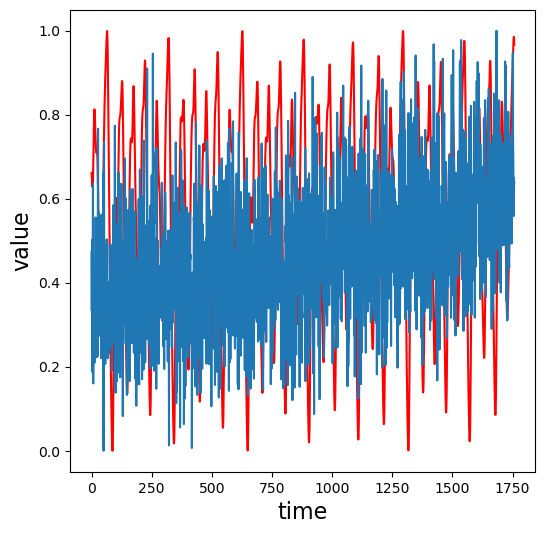

In [625]:
fig = plt.figure()
fig.set_size_inches(6,6)
plt.plot(np.array(y_test_upper),c='r')
plt.plot(per_upper_rid)
plt.xlabel("time",fontsize = 16)
plt.ylabel("value",fontsize = 16)

plt.show()

In [626]:
model_upper.score(x_test_upper,y_test_upper)

-0.005777862318737004

In [627]:
model_upper.intercept_

array([0.77874733])

In [14]:
y_test_upper.shape

NameError: name 'y_test_upper' is not defined

In [629]:
ep=[]
for i in range(1,1750,1):
    RMSE=mean_squared_error(y_test_upper[:i],per_upper_rid[:i])**0.5
    ep.append(RMSE)

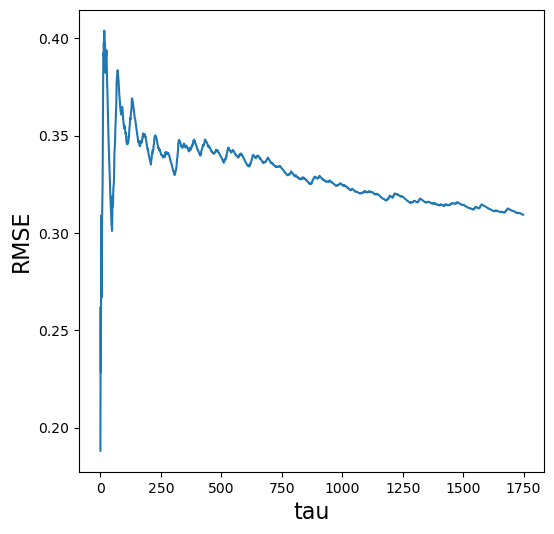

In [630]:
fig = plt.figure()
fig.set_size_inches(6,6)
plt.plot(ep)
plt.xlabel("tau",fontsize = 16)
plt.ylabel("RMSE",fontsize = 16)

plt.show()

In [89]:
ep_n=[]
for i in range(1,1750,1):
    RMSE=mean_squared_error(y_test_upper[:i],per_upper_rid[:i])**0.5
    
    ep_n.append(NRMSE)

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'DataFrame'

In [616]:
per_upper_pd=pd.DataFrame(per_upper_rid,columns=['predict'])
per_upper_pd

,predict
0,0.513334
1,0.290763
2,0.373926
3,0.403758
4,0.217069
...,...
1753,0.736204
1754,0.825036
1755,0.745514
1756,0.609436


In [617]:
y_test_upper=y_test_upper
y_test_upper_pd=pd.DataFrame(y_test_upper,columns=['target'])
corr_pick_upper_pd=pd.concat([per_upper_pd,y_test_upper_pd],axis=1)
corr_pick_upper_pd

,predict,target
0,0.513334,0.661086
1,0.290763,0.651886
2,0.373926,0.641309
3,0.403758,0.632215
4,0.217069,0.627962
...,...,...
1753,0.736204,0.966224
1754,0.825036,0.978759
1755,0.745514,0.985425
1756,0.609436,0.982702


In [618]:
corr_pick_upper_pd.corr()

,predict,target
predict,1.000000,0.024389
target,0.024389,1.000000


In [415]:
RMSE = mean_squared_error(y_test_upper, per_upper_rid)**0.5
RMSE

0.3047573081082775